<a href="https://colab.research.google.com/github/MS0C54073/Spiking-Neural-Network-SNN-with-PyTorch/blob/main/spike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train Epoch: 1 [0/60000 (0%)] Loss: 2.458688 Accuracy: 7.50%
Train Epoch: 1 [10000/60000 (17%)] Loss: 1.795413 Accuracy: 38.10%
Train Epoch: 1 [20000/60000 (33%)] Loss: 1.614255 Accuracy: 38.00%
Train Epoch: 1 [30000/60000 (50%)] Loss: 0.798486 Accuracy: 73.80%
Train Epoch: 1 [40000/60000 (67%)] Loss: 0.612486 Accuracy: 80.70%
Train Epoch: 1 [50000/60000 (83%)] Loss: 0.457767 Accuracy: 86.40%

Test set: Average loss: 0.0004, Accuracy: 8811/10000 (88.11%)

Train Epoch: 2 [0/60000 (0%)] Loss: 0.434840 Accuracy: 86.90%
Train Epoch: 2 [10000/60000 (17%)] Loss: 0.386176 Accuracy: 87.80%
Train Epoch: 2 [20000/60000 (33%)] Loss: 0.407138 Accuracy: 88.00%
Train Epoch: 2 [30000/60000 (50%)] Loss: 0.375062 Accuracy: 89.50%
Train Epoch: 2 [40000/60000 (67%)] Loss: 0.365151 Accuracy: 90.30%
Train Epoch: 2 [50000/60000 (83%)] Loss: 0.379519 Accuracy: 89.20%

Test set: Average loss: 0.0003, Accuracy: 9048/10000 (90.48%)

Train Epoch: 3 [0/60000 (0%)] Loss: 0.377519 Accuracy: 88.30%
Train Epoch: 3 [1

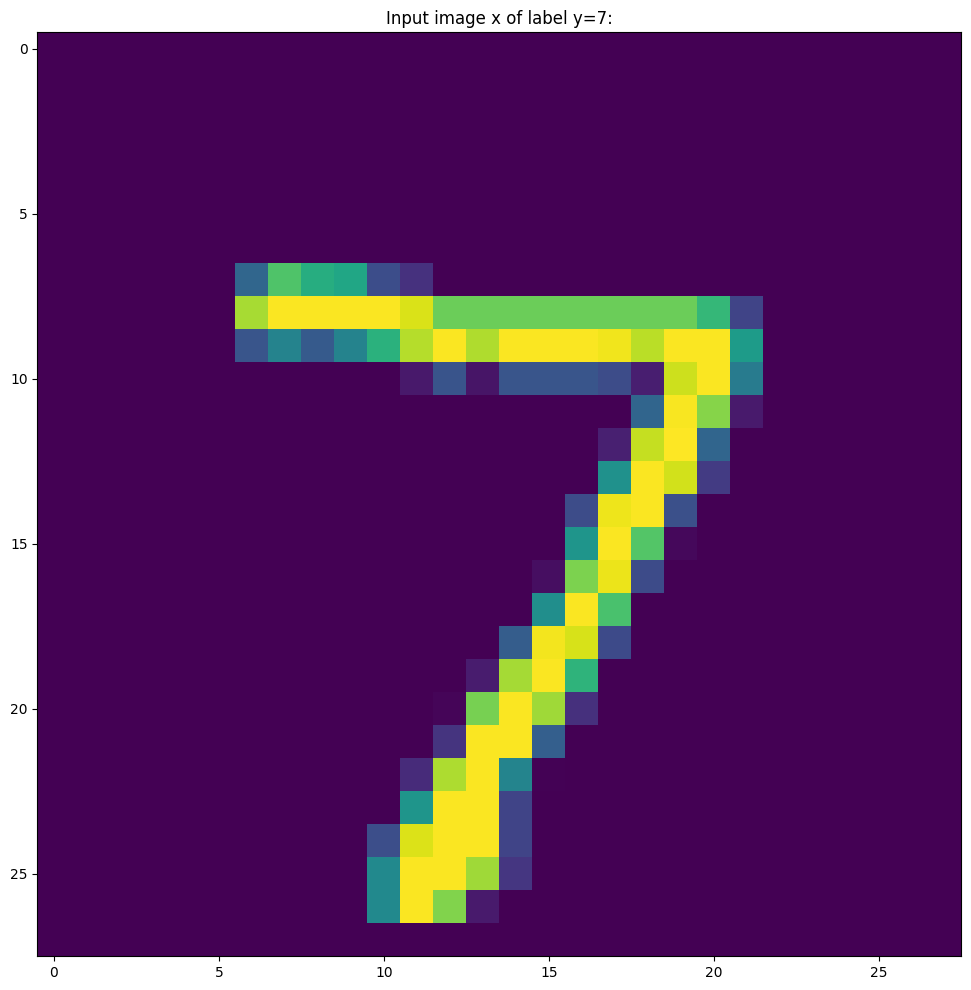

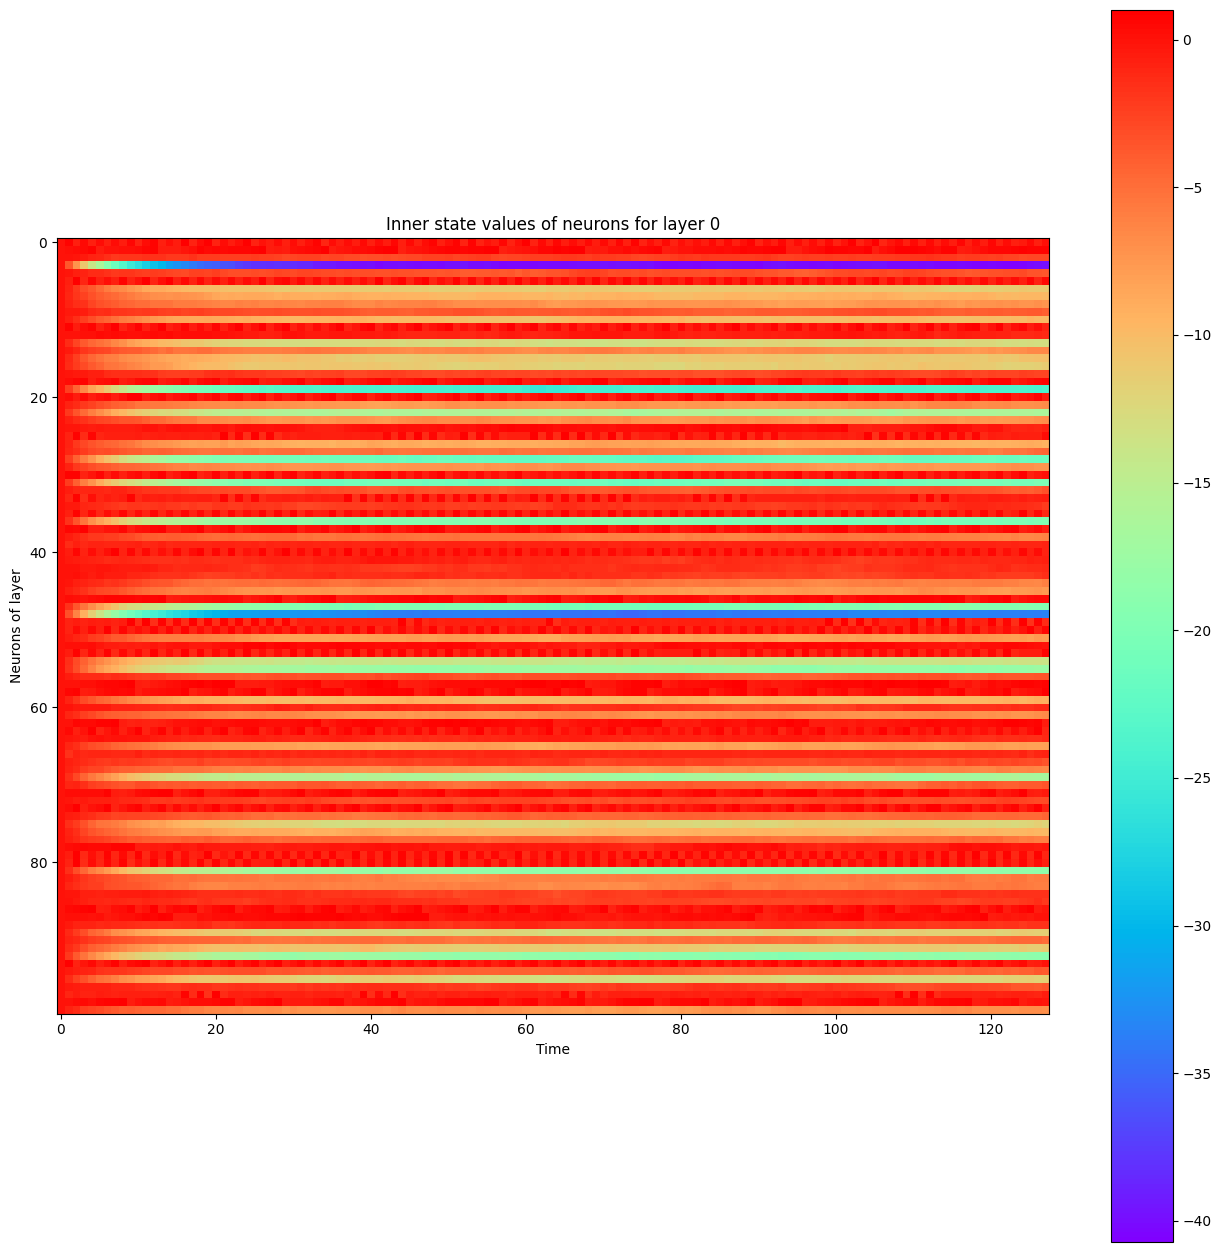

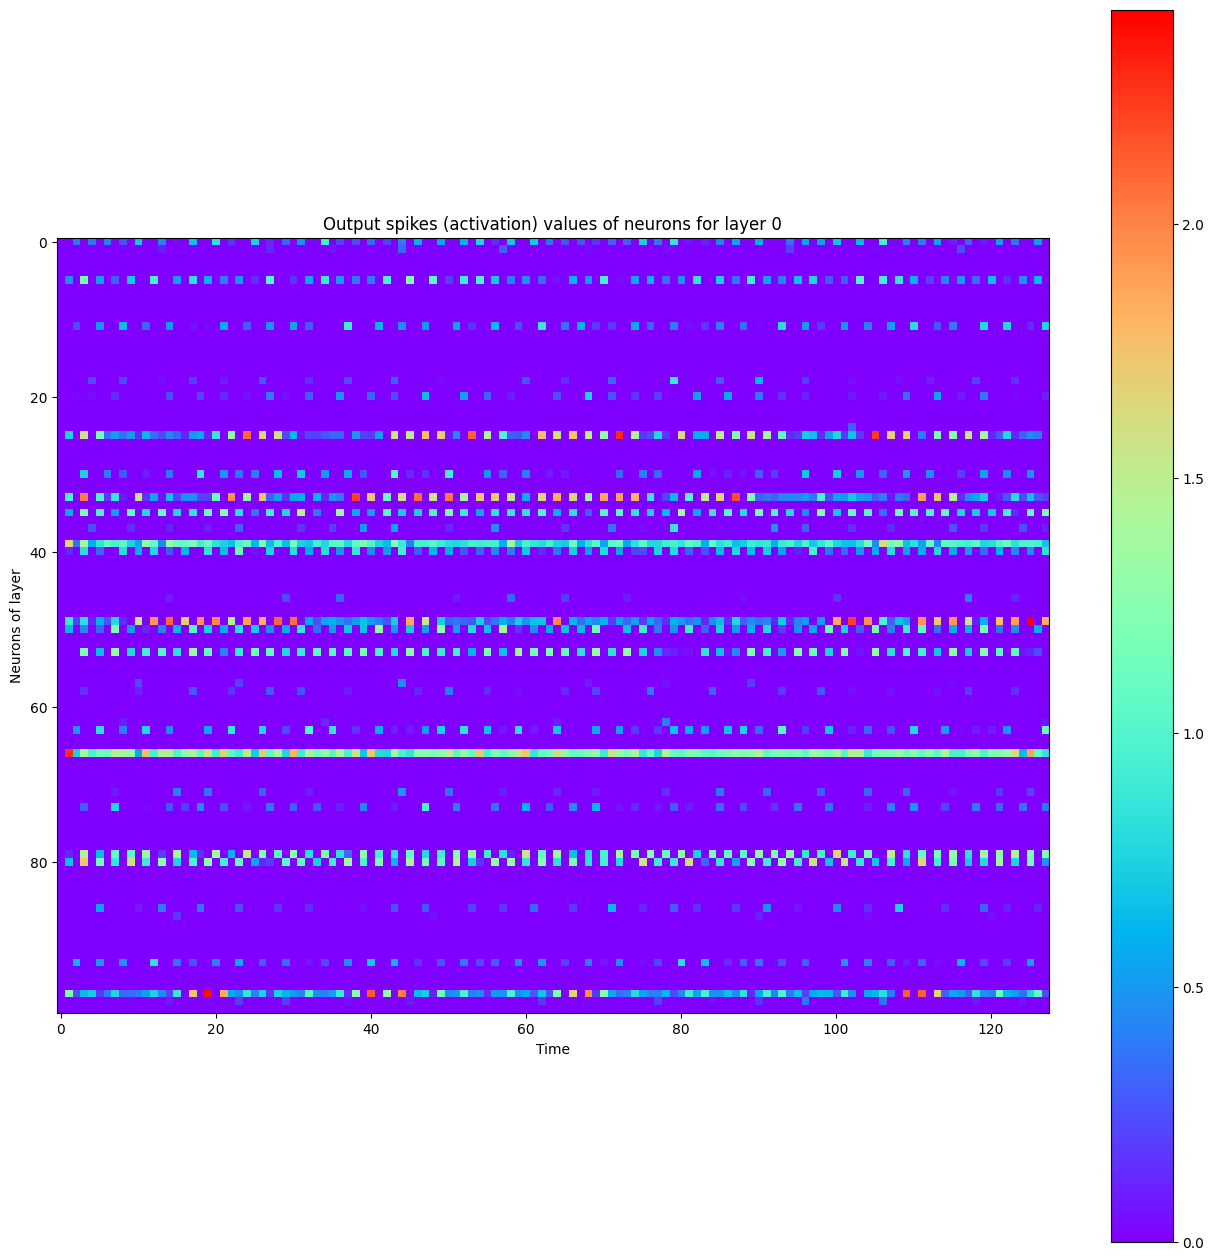

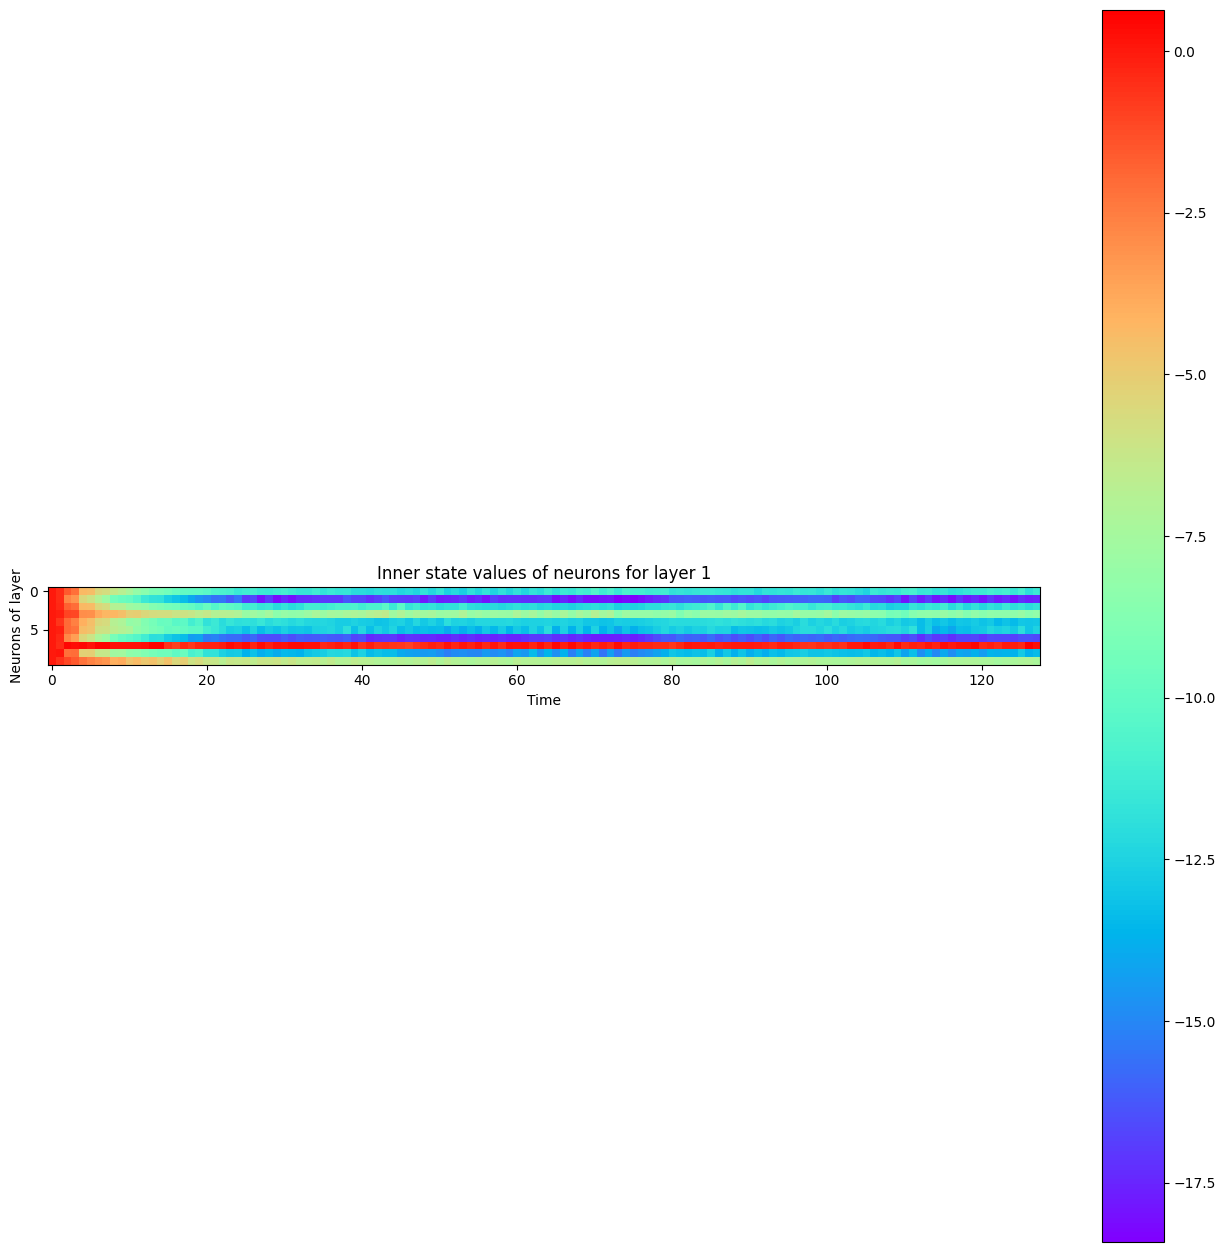

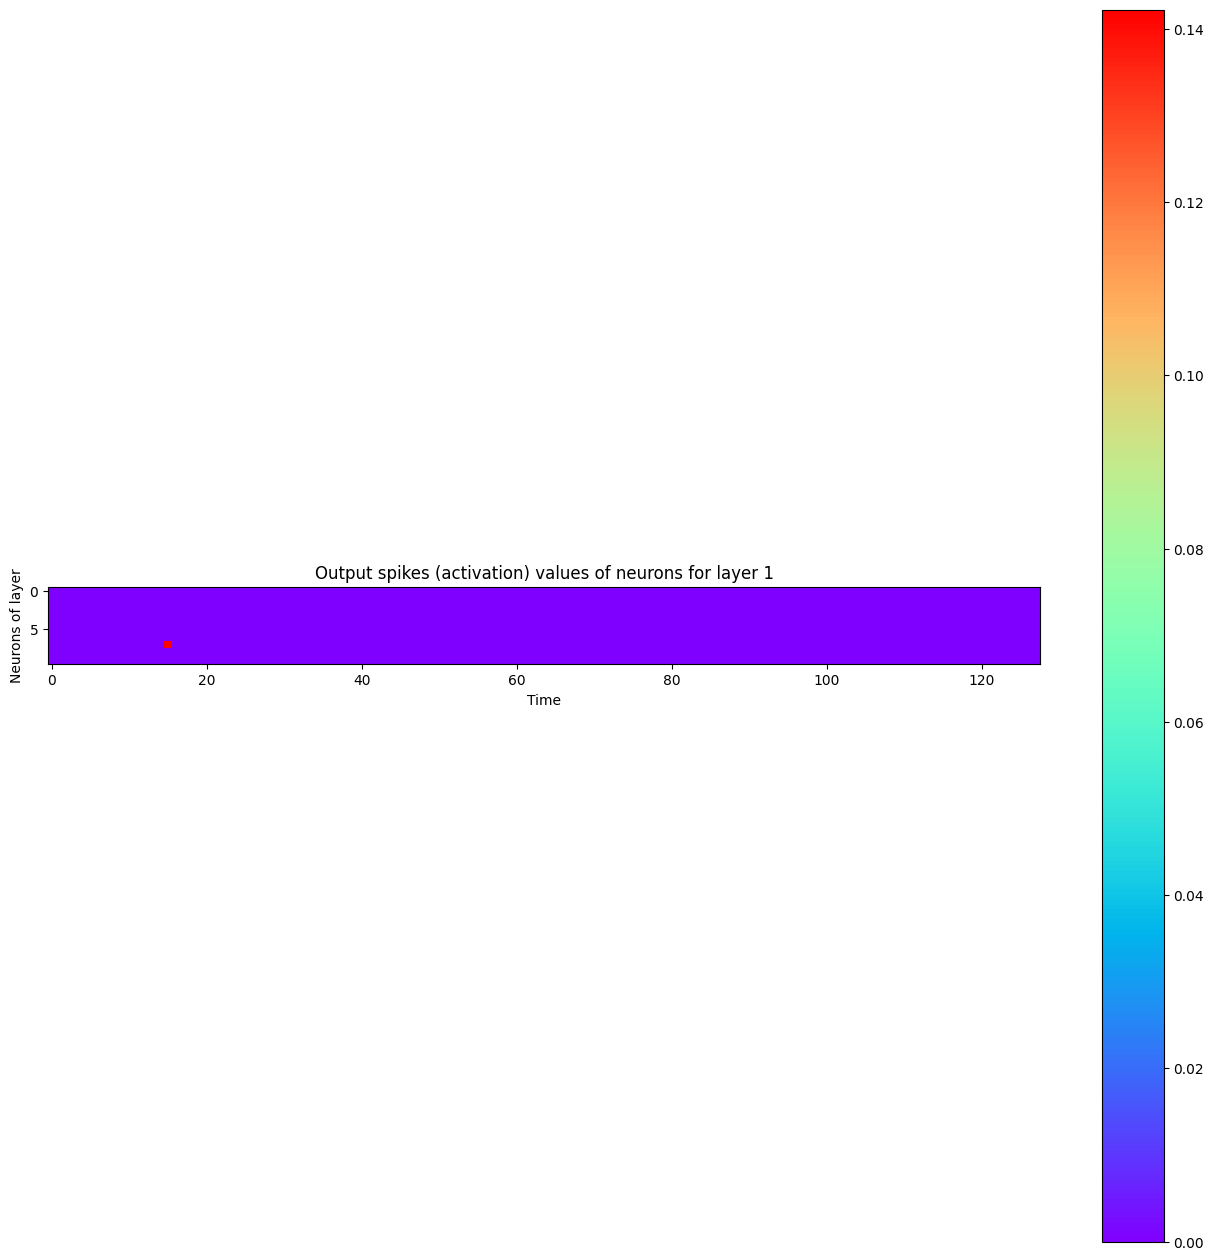

A hidden neuron that looks excited:


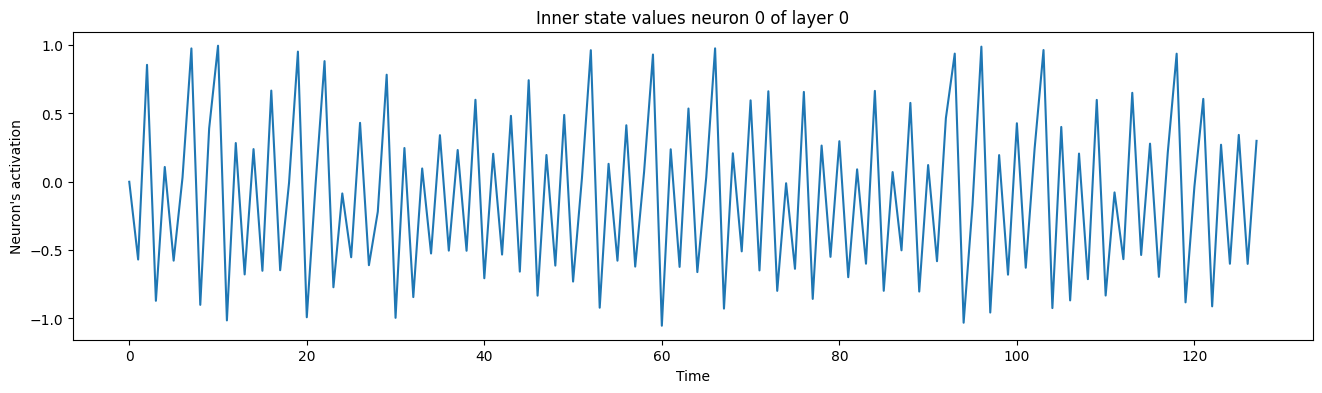

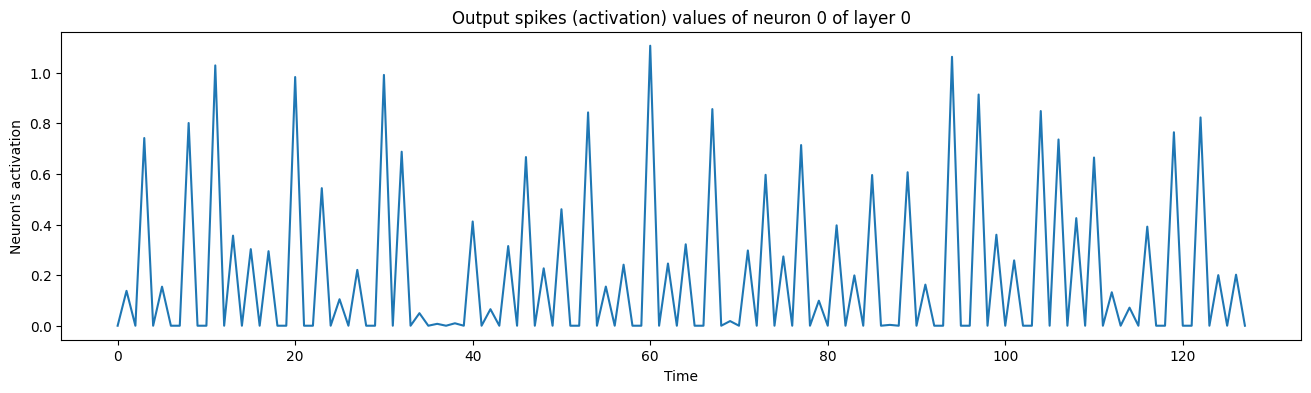

The output neuron of the label:


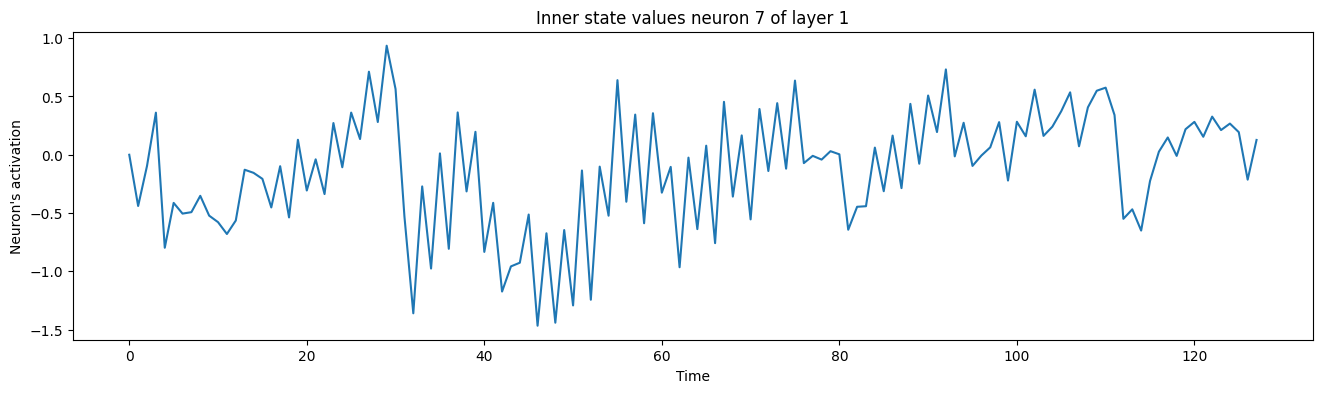

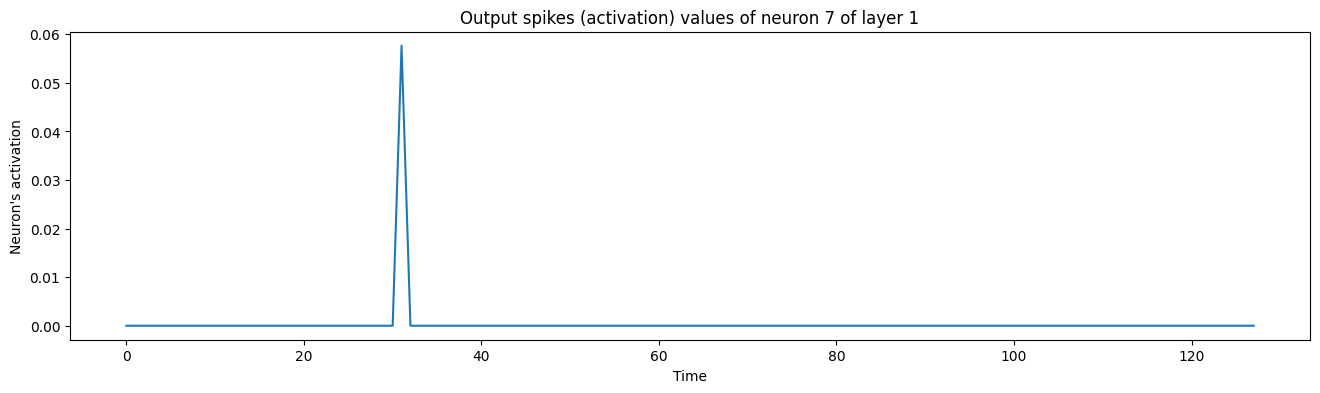

'\nclass TestTraining(unittest.TestCase):\n\n    @classmethod\n    def setUpClass(cls):\n        # Set up the test data and model for all test methods\n        cls.batch_size = 1000\n        cls.DATA_PATH = \'./data\'\n\n        training_set, testing_set = download_mnist(cls.DATA_PATH)\n        cls.train_set_loader = torch.utils.data.DataLoader(\n            dataset=training_set,\n            batch_size=cls.batch_size,\n            shuffle=True)\n        cls.test_set_loader = torch.utils.data.DataLoader(\n            dataset=testing_set,\n            batch_size=cls.batch_size,\n            shuffle=False)\n\n        cls.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n        cls.model = SpikingNet(cls.device, n_time_steps=3, begin_eval=1).to(cls.device)\n\n    def test_train(self):\n        optimizer = optim.SGD(self.model.parameters(), lr=0.1, momentum=0.5)\n        train(self.model, self.device, self.train_set_loader, optimizer, epoch=1, logging_interval=100)\n\

In [2]:
import os
import matplotlib.pyplot as plt
import torchvision.datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torch.autograd import Variable



def train(model, device, train_set_loader, optimizer, epoch, logging_interval=100):
    model.train()
    for batch_idx, (data, target) in enumerate(train_set_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % logging_interval == 0:
            pred = output.max(1, keepdim=True)[1]  # get the index of the max log-probability
            correct = pred.eq(target.view_as(pred)).float().mean().item()
            print('Train Epoch: {} [{}/{} ({:.0f}%)] Loss: {:.6f} Accuracy: {:.2f}%'.format(
                epoch, batch_idx * len(data), len(train_set_loader.dataset),
                100. * batch_idx / len(train_set_loader), loss.item(),
                100. * correct))

def train_many_epochs(model):
    epoch = 1
    optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
    train(model, device, train_set_loader, optimizer, epoch, logging_interval=10)
    test(model, device, test_set_loader)

    epoch = 2
    optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.5)
    train(model, device, train_set_loader, optimizer, epoch, logging_interval=10)
    test(model, device, test_set_loader)

    epoch = 3
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
    train(model, device, train_set_loader, optimizer, epoch, logging_interval=10)
    test(model, device, test_set_loader)

def test(model, device, test_set_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_set_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # Note: with `reduce=True`, I'm not sure what would happen with a final batch size
            # that would be smaller than regular previous batch sizes. For now it works.
            test_loss += F.nll_loss(output, target, reduce=True).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_set_loader.dataset)
    print("")
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)'.format(
        test_loss,
        correct, len(test_set_loader.dataset),
        100. * correct / len(test_set_loader.dataset)))
    print("")

def download_mnist(data_path):
    if not os.path.exists(data_path):
        os.mkdir(data_path)
    transformation = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
    training_set = torchvision.datasets.MNIST(data_path, train=True, transform=transformation, download=True)
    testing_set = torchvision.datasets.MNIST(data_path, train=False, transform=transformation, download=True)
    return training_set, testing_set
batch_size = 1000
DATA_PATH = './data'

training_set, testing_set = download_mnist(DATA_PATH)
train_set_loader = torch.utils.data.DataLoader(
    dataset=training_set,
    batch_size=batch_size,
    shuffle=True)
test_set_loader = torch.utils.data.DataLoader(
    dataset=testing_set,
    batch_size=batch_size,
    shuffle=False)
# Use GPU whever possible!
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
class SpikingNeuronLayerRNN(nn.Module):

    def __init__(self, device, n_inputs=28*28, n_hidden=100, decay_multiplier=0.9, threshold=2.0, penalty_threshold=2.5):
        super(SpikingNeuronLayerRNN, self).__init__()
        self.device = device
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.decay_multiplier = decay_multiplier
        self.threshold = threshold
        self.penalty_threshold = penalty_threshold

        self.fc = nn.Linear(n_inputs, n_hidden)

        self.init_parameters()
        self.reset_state()
        self.to(self.device)

    def init_parameters(self):
        for param in self.parameters():
            if param.dim() >= 2:
                nn.init.xavier_uniform_(param)

    def reset_state(self):
        self.prev_inner = torch.zeros([self.n_hidden]).to(self.device)
        self.prev_outer = torch.zeros([self.n_hidden]).to(self.device)

    def forward(self, x):
        """
        Call the neuron at every time step.

        x: activated_neurons_below

        return: a tuple of (state, output) for each time step. Each item in the tuple
        are then themselves of shape (batch_size, n_hidden) and are PyTorch objects, such
        that the whole returned would be of shape (2, batch_size, n_hidden) if casted.
        """
        if self.prev_inner.dim() == 1:
            # Adding batch_size dimension directly after doing a `self.reset_state()`:
            batch_size = x.shape[0]
            self.prev_inner = torch.stack(batch_size * [self.prev_inner])
            self.prev_outer = torch.stack(batch_size * [self.prev_outer])

        # 1. Weight matrix multiplies the input x
        input_excitation = self.fc(x)

        # 2. We add the result to a decayed version of the information we already had.
        inner_excitation = input_excitation + self.prev_inner * self.decay_multiplier

        # 3. We compute the activation of the neuron to find its output value,
        #    but before the activation, there is also a negative bias that refrain thing from firing too much.
        outer_excitation = F.relu(inner_excitation - self.threshold)

        # 4. If the neuron fires, the activation of the neuron is subtracted to its inner state
        #    (and with an extra penalty for increase refractory time),
        #    because it discharges naturally so it shouldn't fire twice.
        do_penalize_gate = (outer_excitation > 0).float()
        # TODO: remove following /2?
        inner_excitation = inner_excitation - (self.penalty_threshold/self.threshold * inner_excitation) * do_penalize_gate

        # 5. The outer excitation has a negative part after the positive part.
        outer_excitation = outer_excitation #+ torch.abs(self.prev_outer) * self.decay_multiplier / 2.0

        # 6. Setting internal values before returning.
        #    And the returning value is the one of the previous time step to delay
        #    activation of 1 time step of "processing" time. For logits, we don't take activation.
        delayed_return_state = self.prev_inner
        delayed_return_output = self.prev_outer
        self.prev_inner = inner_excitation
        self.prev_outer = outer_excitation
        return delayed_return_state, delayed_return_output


class InputDataToSpikingPerceptronLayer(nn.Module):

    def __init__(self, device):
        super(InputDataToSpikingPerceptronLayer, self).__init__()
        self.device = device

        self.reset_state()
        self.to(self.device)

    def reset_state(self):
        #     self.prev_state = torch.zeros([self.n_hidden]).to(self.device)
        pass

    def forward(self, x, is_2D=True):
        x = x.view(x.size(0), -1)  # Flatten 2D image to 1D for FC
        random_activation_perceptron = torch.rand(x.shape).to(self.device)
        return random_activation_perceptron * x


class OutputDataToSpikingPerceptronLayer(nn.Module):

    def __init__(self, average_output=True):
        """
        average_output: might be needed if this is used within a regular neural net as a layer.
        Otherwise, sum may be numerically more stable for gradients with setting average_output=False.
        """
        super(OutputDataToSpikingPerceptronLayer, self).__init__()
        if average_output:
            self.reducer = lambda x, dim: x.sum(dim=dim)
        else:
            self.reducer = lambda x, dim: x.mean(dim=dim)

    def forward(self, x):
        if type(x) == list:
            x = torch.stack(x)
        return self.reducer(x, 0)


class SpikingNet(nn.Module):

    def __init__(self, device, n_time_steps, begin_eval):
        super(SpikingNet, self).__init__()
        assert (0 <= begin_eval and begin_eval < n_time_steps)
        self.device = device
        self.n_time_steps = n_time_steps
        self.begin_eval = begin_eval

        self.input_conversion = InputDataToSpikingPerceptronLayer(device)

        self.layer1 = SpikingNeuronLayerRNN(
            device, n_inputs=28*28, n_hidden=100,
            decay_multiplier=0.9, threshold=1.0, penalty_threshold=1.5
        )

        self.layer2 = SpikingNeuronLayerRNN(
            device, n_inputs=100, n_hidden=10,
            decay_multiplier=0.9, threshold=1.0, penalty_threshold=1.5
        )

        self.output_conversion = OutputDataToSpikingPerceptronLayer(average_output=False)  # Sum on outputs.

        self.to(self.device)

    def forward_through_time(self, x):
        """
        This acts as a layer. Its input is non-time-related, and its output too.
        So the time iterations happens inside, and the returned layer is thus
        passed through global average pooling on the time axis before the return
        such as to be able to mix this pipeline with regular backprop layers such
        as the input data and the output data.
        """
        self.input_conversion.reset_state()
        self.layer1.reset_state()
        self.layer2.reset_state()

        out = []

        all_layer1_states = []
        all_layer1_outputs = []
        all_layer2_states = []
        all_layer2_outputs = []
        for _ in range(self.n_time_steps):
            xi = self.input_conversion(x)

            # For layer 1, we take the regular output.
            layer1_state, layer1_output = self.layer1(xi)

            # We take inner state of layer 2 because it's pre-activation and thus acts as out logits.
            layer2_state, layer2_output = self.layer2(layer1_output)

            all_layer1_states.append(layer1_state)
            all_layer1_outputs.append(layer1_output)
            all_layer2_states.append(layer2_state)
            all_layer2_outputs.append(layer2_output)
            out.append(layer2_state)

        out = self.output_conversion(out[self.begin_eval:])
        return out, [[all_layer1_states, all_layer1_outputs], [all_layer2_states, all_layer2_outputs]]

    def forward(self, x):
        out, _ = self.forward_through_time(x)
        return F.log_softmax(out, dim=-1)

    def visualize_all_neurons(self, x):
        assert x.shape[0] == 1 and len(x.shape) == 4, (
            "Pass only 1 example to SpikingNet.visualize(x) with outer dimension shape of 1.")
        _, layers_state = self.forward_through_time(x)

        for i, (all_layer_states, all_layer_outputs) in enumerate(layers_state):
            layer_state  =  torch.stack(all_layer_states).data.cpu().numpy().squeeze().transpose()
            layer_output = torch.stack(all_layer_outputs).data.cpu().numpy().squeeze().transpose()

            self.plot_layer(layer_state, title="Inner state values of neurons for layer {}".format(i))
            self.plot_layer(layer_output, title="Output spikes (activation) values of neurons for layer {}".format(i))

    def visualize_neuron(self, x, layer_idx, neuron_idx):
        assert x.shape[0] == 1 and len(x.shape) == 4, (
            "Pass only 1 example to SpikingNet.visualize(x) with outer dimension shape of 1.")
        _, layers_state = self.forward_through_time(x)

        all_layer_states, all_layer_outputs = layers_state[layer_idx]
        layer_state  =  torch.stack(all_layer_states).data.cpu().numpy().squeeze().transpose()
        layer_output = torch.stack(all_layer_outputs).data.cpu().numpy().squeeze().transpose()

        self.plot_neuron(layer_state[neuron_idx], title="Inner state values neuron {} of layer {}".format(neuron_idx, layer_idx))
        self.plot_neuron(layer_output[neuron_idx], title="Output spikes (activation) values of neuron {} of layer {}".format(neuron_idx, layer_idx))

    def plot_layer(self, layer_values, title):
        width = max(16, layer_values.shape[0] / 8)
        height = max(4, layer_values.shape[1] / 8)
        plt.figure(figsize=(width, height))
        plt.imshow(
            layer_values,
            interpolation="nearest",
            cmap=plt.cm.rainbow
        )
        plt.title(title)
        plt.colorbar()
        plt.xlabel("Time")
        plt.ylabel("Neurons of layer")
        plt.show()

    def plot_neuron(self, neuron_through_time, title):
        width = max(16, len(neuron_through_time) / 8)
        height = 4
        plt.figure(figsize=(width, height))
        plt.title(title)
        plt.plot(neuron_through_time)
        plt.xlabel("Time")
        plt.ylabel("Neuron's activation")
        plt.show()

class NonSpikingNet(nn.Module):

    def __init__(self):
        super(NonSpikingNet, self).__init__()
        self.layer1 = nn.Linear(28*28, 100)
        self.layer2 = nn.Linear(100, 10)

    def forward(self, x, is_2D=True):
        x = x.view(x.size(0), -1)  # Flatten 2D image to 1D for FC
        x = F.relu(self.layer1(x))
        x =        self.layer2(x)
        return F.log_softmax(x, dim=-1)

#Training a Spiking Neural Network (SNN)
#Let's use our SpikingNet!
spiking_model = SpikingNet(device, n_time_steps=128, begin_eval=0)
train_many_epochs(spiking_model)

#2
non_spiking_model = NonSpikingNet().to(device)
train_many_epochs(non_spiking_model)
#3
data, target = test_set_loader.__iter__().__next__()

# taking 1st testing example:
x = torch.stack([data[0]])
y = target.data.numpy()[0]
plt.figure(figsize=(12,12))
plt.imshow(x.data.cpu().numpy()[0,0])
plt.title("Input image x of label y={}:".format(y))
plt.show()

# plotting neuron's activations:
spiking_model.visualize_all_neurons(x)
print("A hidden neuron that looks excited:")
spiking_model.visualize_neuron(x, layer_idx=0, neuron_idx=0)
print("The output neuron of the label:")
spiking_model.visualize_neuron(x, layer_idx=1, neuron_idx=y)


#UnitTest code



# Define the model classes and functions

# ...

# Define the unit tests

'''
class TestTraining(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        # Set up the test data and model for all test methods
        cls.batch_size = 1000
        cls.DATA_PATH = './data'

        training_set, testing_set = download_mnist(cls.DATA_PATH)
        cls.train_set_loader = torch.utils.data.DataLoader(
            dataset=training_set,
            batch_size=cls.batch_size,
            shuffle=True)
        cls.test_set_loader = torch.utils.data.DataLoader(
            dataset=testing_set,
            batch_size=cls.batch_size,
            shuffle=False)

        cls.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        cls.model = SpikingNet(cls.device, n_time_steps=3, begin_eval=1).to(cls.device)

    def test_train(self):
        optimizer = optim.SGD(self.model.parameters(), lr=0.1, momentum=0.5)
        train(self.model, self.device, self.train_set_loader, optimizer, epoch=1, logging_interval=100)

        # Assert that the model is in training mode
        self.assertTrue(self.model.training)

    def test_test(self):
        test(self.model, self.device, self.test_set_loader)

        # Assert that the model is in evaluation mode
        self.assertFalse(self.model.training)

class TestSpikingNeuronLayerRNN(unittest.TestCase):

    def setUp(self):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.n_inputs = 10
        self.n_hidden = 5
        self.model = SpikingNeuronLayerRNN(self.device, n_inputs=self.n_inputs, n_hidden=self.n_hidden)

    def test_forward(self):
        x = torch.randn(32, self.n_inputs).to(self.device)
        state, output = self.model.forward(x)

        # Assert the shapes of the state and output tensors
        self.assertEqual(state.shape, (32, self.n_hidden))
        self.assertEqual(output.shape, (32, self.n_hidden))

    def test_reset_state(self):
        self.model.reset_state()

        # Assert that the previous inner and outer states are all zeros
        self.assertTrue(torch.all(self.model.prev_inner == 0))
        self.assertTrue(torch.all(self.model.prev_outer == 0))

class TestInputDataToSpikingPerceptronLayer(unittest.TestCase):

    def setUp(self):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = InputDataToSpikingPerceptronLayer(self.device)

    def test_forward(self):
        x = torch.randn(32, 10, 28, 28).to(self.device)
        output = self.model.forward(x)

        # Assert the shape of the output tensor
        self.assertEqual(output.shape, (32, 10, 28, 28))

class TestOutputDataToSpikingPerceptronLayer(unittest.TestCase):

    def setUp(self):
        self.average_output = True
        self.model = OutputDataToSpikingPerceptronLayer(average_output=self.average_output)

    def test_forward(self):
        x = [torch.randn(32, 10) for _ in range(3)]
        output = self.model.forward(x)

        # Assert the shape of the output tensor
        self.assertEqual(output.shape, (32, 10))

class TestSpikingNet(unittest.TestCase):

    def setUp(self):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = SpikingNet(self.device, n_time_steps=3, begin_eval=1).to(self.device)

    def test_forward(self):
        x = torch.randn(32, 1, 28, 28).to(self.device)
        output = self.model.forward(x)

        # Assert the shape of the output tensor
        self.assertEqual(output.shape, (32, 10))

class TestDownloadMNIST(unittest.TestCase):

    def test_download_mnist(self):
        data_path = './data'
        training_set, testing_set = download_mnist(data_path)

        # Check if the datasets are downloaded and loaded correctly
        self.assertTrue(len(training_set) > 0)
        self.assertTrue(len(testing_set) > 0)

#if __name__ == '__main__':
    #unittest.main()
#'''